In [2]:
####    
#lokale SA TMeasy TUfast
####

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm

i = 1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

s = 0.1 

params_Fy = [2.48428391e+05,
7.45113790e+03,
5.28849020e+03,
6.06693945e-02,
2.61320192e-01,
9.09203532e-01]

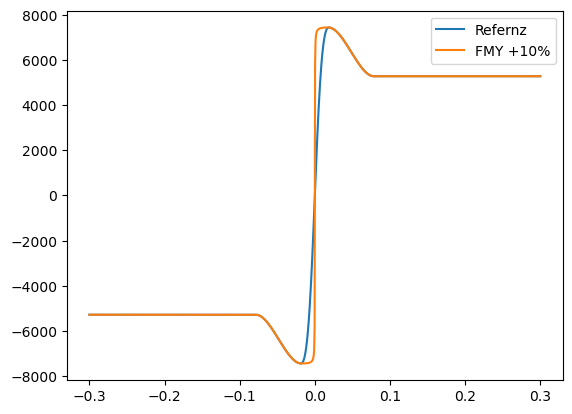

In [12]:
#Plot
params_Fy_10 = [2.48428391e+05,
7.45113790e+03 ,
5.28849020e+03,
6.06693945e-02,
2.61320192e-01,
9.09203532e-01]                #SMX

Fy = tm.calcFx(Sx,Sy,*params_Fy)
Fy_10 = tm.calcFx(Sx,Sy,*params_Fy_10)

plt.plot(Sy,Fy, label = 'Refernz')
plt.plot(Sy,Fy_10, label = 'FMY +10%')
plt.legend()


In [18]:
#Vergleichsgrößen
def Fx_intervall(Fx,Fx_intv): #Fz in [kN], Fx_intv in % (z.b 10% von Fx_max)
#x Position von Fx_max berechnene
    w=len(Fx)
    Fx_max_pos=0
    for j in range(0,w):
        if Fx[j] == np.max(Fx):
            break
        else:
            Fx_max_pos = Fx_max_pos + 1

    #cut slop
    cut = int(w/2)
    Fx_w_pos = Fx[cut::]
    Fx_w_pos_max=Fx_w_pos[0:((Fx_max_pos-cut)+1)] #von 0 bis Fx_max
    Fx_w_max_end=Fx_w_pos[((Fx_max_pos-cut)+1)::] #von Fx_max bis Ende(+100% slipratio)

    Fx_max_ref = np.max(Fx) * Fx_intv #Referenzwert Fx 10% weniger als Fx_max

    left=0
    j=0
    for j in range(0,len(Fx_w_pos_max)):
        if Fx_w_pos_max[j] < Fx_max_ref:
            left +=1
        else:
            break
        
    right = 0
    j=0
    for j in range(0,len(Fx_w_max_end)):
        if Fx_w_max_end[j] > Fx_max_ref:
            right +=1
        else:
            break
        
#Intervall 10% abweichung von Fx_max = [left,right]
    Fx_max_10=Fx[cut+left:cut+len(Fx_w_pos_max)+right]
    Fx_slope_b=((len(Fx_w_pos_max)+right)-left)/(cut/100) #breite des Intervalls in %Schlupf
    
    return Fx_slope_b,Fx_max_10,cut,left,right,Fx_w_pos_max

def diff_func(y,SL): #y = Funktion die abgleitet werden soll, Sl = linspace
    dx = SL[1]-SL[0]
    dydx = np.gradient(y, dx)
    
    return dydx

def slope_func(y,Sx):
    a = int(len(Sx)/2) + 1
    slope = diff_func(y,Sx)[a]
    return slope

Text(0.5, 1.0, 'lokale SA Fx_max, Parameter +10% ')

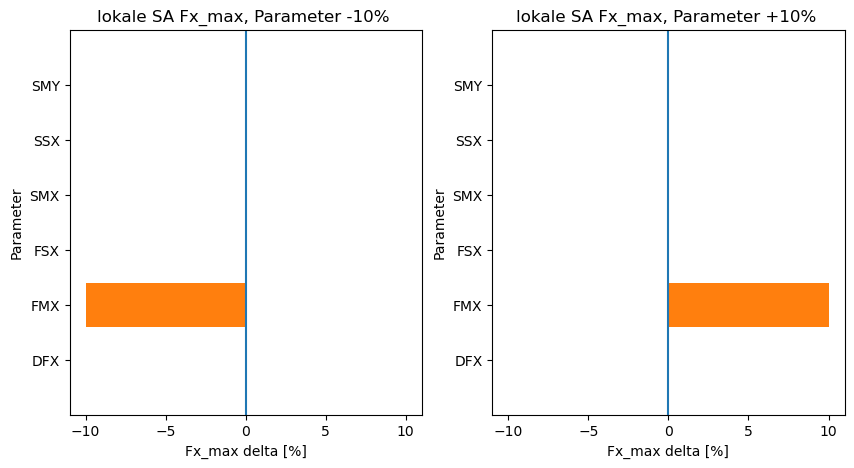

In [19]:
####    
#Fx_max
####

params = deepcopy(params_Fy)

params_Set = np.zeros(len(params_Fy))
params_pos = params_Fy
params_neg = params_Fy
delta=np.zeros([len(params_Fy),2])
i=0
for i in range(0,len(params_Fy)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = (np.max(tm.calcFx(Sx,Sy,*params)) - np.max(tm.calcFx(Sx,Sy,*params_pos)))/np.max(tm.calcFx(Sx,Sy,*params))
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = (np.max(tm.calcFx(Sx,Sy,*params)) - np.max(tm.calcFx(Sx,Sy,*params_neg)))/np.max(tm.calcFx(Sx,Sy,*params))
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

delta_debugg_Fx_max = deepcopy(delta)

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax1.barh(y_pos[i],delta_pos[i])
ax1.set_yticks(y_pos, labels=y_axis)
ax1.set_xlim(-11,11)
ax1.set_ylim(-1,len(y_axis))
ax1.axvline(0, 0, 1)
ax1.set_xlabel("Fx_max delta [%]")
ax1.set_ylabel("Parameter")
ax1.set_title('lokale SA Fx_max, Parameter -10% ')

y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax2.barh(y_pos[i],delta_neg[i])
ax2.set_yticks(y_pos, labels=y_axis)
ax2.set_xlim(-11,11)
ax2.set_ylim(-1,len(y_axis))
ax2.axvline(0, 0, 1)
ax2.set_xlabel("Fx_max delta [%]")
ax2.set_ylabel("Parameter")
ax2.set_title('lokale SA Fx_max, Parameter +10% ')

Text(0.5, 1.0, 'lokale SA Schlupf Fx_max, Parameter -10% ')

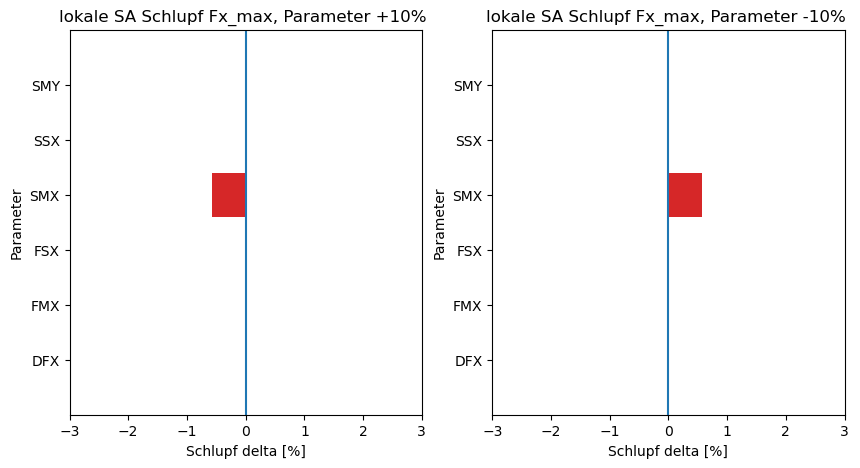

In [20]:
####
#slip at Fx_max
####

params = deepcopy(params_Fy)

params_Set = np.zeros(len(params_Fy))
params_pos = params_Fy
params_neg = params_Fy
delta=np.zeros([len(params_Fy),2])
i=0
for i in range(0,len(params_Fy)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = (np.argmax(tm.calcFx(Sx,Sy,*params)) - np.argmax(tm.calcFx(Sx,Sy,*params_pos)))/np.argmax(tm.calcFx(Sx,Sy,*params))
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = (np.argmax(tm.calcFx(Sx,Sy,*params)) - np.argmax(tm.calcFx(Sx,Sy,*params_neg)))/np.argmax(tm.calcFx(Sx,Sy,*params))
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

delta_debugg_Fx_max = deepcopy(delta)

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax1.barh(y_pos[i],delta_pos[i])
ax1.set_yticks(y_pos, labels=y_axis)
ax1.set_xlim(-3,3)
ax1.set_ylim(-1,len(y_axis))
ax1.axvline(0, 0, 1)
ax1.set_xlabel("Schlupf delta [%]")
ax1.set_ylabel("Parameter")
ax1.set_title('lokale SA Schlupf Fx_max, Parameter +10% ')

y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax2.barh(y_pos[i],delta_neg[i])
ax2.set_yticks(y_pos, labels=y_axis)
ax2.set_xlim(-3,3)
ax2.set_ylim(-1,len(y_axis))
ax2.axvline(0, 0, 1)
ax2.set_xlabel("Schlupf delta [%]")
ax2.set_ylabel("Parameter")
ax2.set_title('lokale SA Schlupf Fx_max, Parameter -10% ')

Text(0.5, 1.0, '90% Intervall Fx_max, Parameter +10% ')

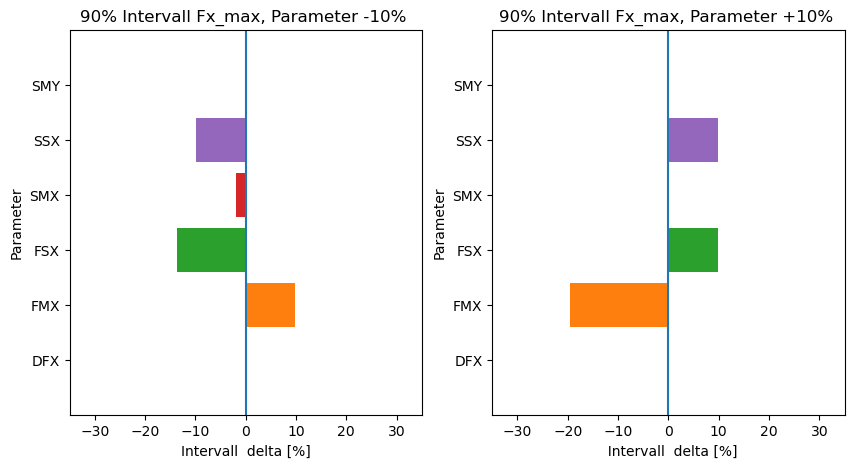

In [21]:
####
#Intervall Slip +/-10% von Fx_max
####
Fx_intv=0.9

params = deepcopy(params_Fy)

params_Set = np.zeros(len(params_Fy))
params_pos = params_Fy
params_neg = params_Fy
delta=np.zeros([len(params_Fy),2])
i=0
for i in range(0,len(params_Fy)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = (Fx_intervall(tm.calcFx(Sx,Sy,*params),Fx_intv)[0] - Fx_intervall(tm.calcFx(Sx,Sy,*params_pos),Fx_intv)[0])/Fx_intervall(tm.calcFx(Sx,Sy,*params),Fx_intv)[0]
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = (Fx_intervall(tm.calcFx(Sx,Sy,*params),Fx_intv)[0] - Fx_intervall(tm.calcFx(Sx,Sy,*params_neg),Fx_intv)[0])/Fx_intervall(tm.calcFx(Sx,Sy,*params),Fx_intv)[0]
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

delta_debugg_Fx_max = deepcopy(delta)

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax1.barh(y_pos[i],delta_pos[i])
ax1.set_yticks(y_pos, labels=y_axis)
ax1.set_xlim(-35,35)
ax1.set_ylim(-1,len(y_axis))
ax1.axvline(0, 0, 1)
ax1.set_xlabel("Intervall  delta [%]")
ax1.set_ylabel("Parameter")
ax1.set_title('90% Intervall Fx_max, Parameter -10% ')

y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax2.barh(y_pos[i],delta_neg[i])
ax2.set_yticks(y_pos, labels=y_axis)
ax2.set_xlim(-35,35)
ax2.set_ylim(-1,len(y_axis))
ax2.axvline(0, 0, 1)
ax2.set_xlabel("  Intervall  delta [%]")
ax2.set_ylabel("Parameter")
ax2.set_title('90% Intervall Fx_max, Parameter +10% ')

Text(0.5, 1.0, 'Anfangssteigung, Parameter +10% ')

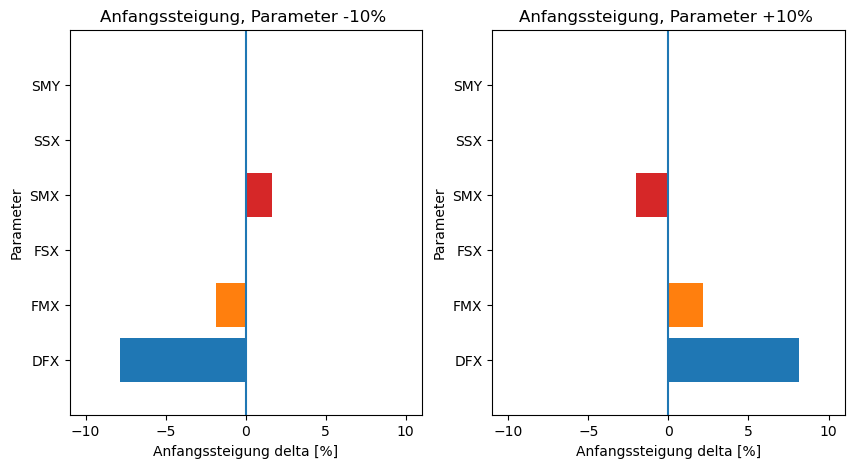

In [22]:
####
#Schräglaufsteifigkeit
####


params = deepcopy(params_Fy)

params_Set = np.zeros(len(params_Fy))
params_pos = params_Fy
params_neg = params_Fy
delta=np.zeros([len(params_Fy),2])
i=0
for i in range(0,len(params_Fy)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = (slope_func(tm.calcFx(Sx,Sy,*params),Sy) - slope_func(tm.calcFx(Sx,Sy,*params_pos),Sy))/slope_func(tm.calcFx(Sx,Sy,*params),Sy)
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = (slope_func(tm.calcFx(Sx,Sy,*params),Sy) - slope_func(tm.calcFx(Sx,Sy,*params_neg),Sy))/slope_func(tm.calcFx(Sx,Sy,*params),Sy)
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

delta_debugg_Fx_max = deepcopy(delta)

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax1.barh(y_pos[i],delta_pos[i])
ax1.set_yticks(y_pos, labels=y_axis)
ax1.set_xlim(-11,11)
ax1.set_ylim(-1,len(y_axis))
ax1.axvline(0, 0, 1)
ax1.set_xlabel("Anfangssteigung delta [%]")
ax1.set_ylabel("Parameter")
ax1.set_title('Anfangssteigung, Parameter -10% ')

y_axis=('DFX', 'FMX', 'FSX', 'SMX', 'SSX', 'SMY')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax2.barh(y_pos[i],delta_neg[i])
ax2.set_yticks(y_pos, labels=y_axis)
ax2.set_xlim(-11,11)
ax2.set_ylim(-1,len(y_axis))
ax2.axvline(0, 0, 1)
ax2.set_xlabel("Anfangssteigung delta [%]")
ax2.set_ylabel("Parameter")
ax2.set_title('Anfangssteigung, Parameter +10% ')